# Customer Segmentation

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Dataset

In [2]:
raw_df = pd.read_excel('../dataset/Online Retail.xlsx', sheet_name='Online Retail')
raw_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
raw_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
raw_df = raw_df.dropna(subset=['CustomerID'])

In [5]:
raw_df.shape

(406829, 8)

## 1. New vs. Repeat Customers

In [6]:
df = raw_df.dropna()

In [7]:
df = df.loc[
    df["Quantity"] > 0
]
df["Sales"] = df["Quantity"] * df["UnitPrice"]

In [8]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [9]:
df["month"] = df["InvoiceDate"].dt.strftime("%Y-%m-01")

In [10]:
monthly_data = []

for each_month in sorted(df["month"].unique()):
    up_to_last_month_df = df.loc[
        df["month"] < each_month
    ]
    this_month_df = df.loc[
        df["month"] == each_month
    ]
    curr_customers = set(this_month_df["CustomerID"].unique())
    prev_customers = set(up_to_last_month_df["CustomerID"].unique())
    
    repeat_customers = curr_customers.intersection(prev_customers)
    new_customers = curr_customers - prev_customers
    
    curr_sales = this_month_df["Sales"].sum()
    
    sales_from_new_customers = this_month_df.loc[
        this_month_df["CustomerID"].isin(new_customers)
    ]["Sales"].sum()
    sales_from_repeat_customers = this_month_df.loc[
        this_month_df["CustomerID"].isin(repeat_customers)
    ]["Sales"].sum()
    
    avg_sales_from_new_customers = this_month_df.loc[
        this_month_df["CustomerID"].isin(new_customers)
    ]["Sales"].mean()
    avg_sales_from_repeat_customers = this_month_df.loc[
        this_month_df["CustomerID"].isin(repeat_customers)
    ]["Sales"].mean()
    
    monthly_data.append({
        "month": each_month,
        
        "num_customers": len(curr_customers),
        "repeat_customers": len(repeat_customers),
        "new_customers": len(new_customers),
        
        "curr_sales": curr_sales,
        "sales_from_new_customers": sales_from_new_customers,
        "sales_from_repeat_customers": sales_from_repeat_customers,
        "avg_sales_from_new_customers": avg_sales_from_new_customers,
        "avg_sales_from_repeat_customers": avg_sales_from_repeat_customers,
    })
        

In [11]:
monthly_data_df = pd.DataFrame(monthly_data).set_index("month").iloc[1:-1]
monthly_data_df["repeat_customer_percentage"] = monthly_data_df["repeat_customers"]/monthly_data_df["num_customers"]
monthly_data_df["repeat_sales_percentage"] = monthly_data_df["sales_from_repeat_customers"]/monthly_data_df["curr_sales"]

In [12]:
monthly_data_df

,num_customers,repeat_customers,new_customers,curr_sales,sales_from_new_customers,sales_from_repeat_customers,avg_sales_from_new_customers,avg_sales_from_repeat_customers,repeat_customer_percentage,repeat_sales_percentage
month,,,,,,,,,,
2011-01-01,741,324,417,569445.040,293207.350,276237.690,26.556231,27.106044,0.437247,0.485100
2011-02-01,758,378,380,447137.350,158142.070,288995.280,17.707096,26.279465,0.498681,0.646323
2011-03-01,974,522,452,595500.760,200069.960,395430.800,17.461159,25.156231,0.535934,0.664031
2011-04-01,856,556,300,469200.361,122011.491,347188.870,16.857073,22.535952,0.649533,0.739959
2011-05-01,1056,772,284,678594.560,124103.780,554490.780,20.275083,24.975937,0.731061,0.817116
2011-06-01,991,749,242,661213.690,135742.950,525470.740,23.764522,24.471231,0.755802,0.794706
2011-07-01,949,761,188,600091.011,74008.751,526082.260,14.825471,24.093531,0.801897,0.876671
2011-08-01,935,766,169,645343.900,79756.100,565587.800,16.420856,25.527523,0.819251,0.876413
2011-09-01,1266,967,299,952838.382,155103.901,797734.481,18.698481,25.137371,0.763823,0.837219


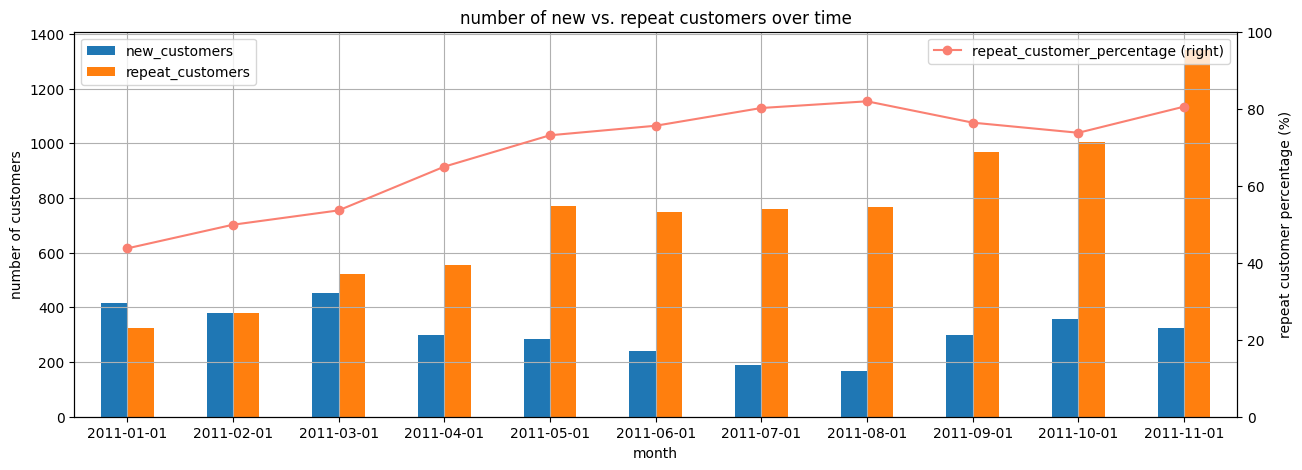

In [13]:
ax = monthly_data_df[[
    "new_customers", "repeat_customers"
]].plot(kind="bar", grid=True, figsize=(15,5))
(monthly_data_df["repeat_customer_percentage"]*100).plot(
    ax=ax, secondary_y=True, color="salmon", style="-o"
)
ax.right_ax.legend()
ax.right_ax.set_ylim([0, 100.0])
ax.right_ax.set_ylabel("repeat customer percentage (%)")
ax.set_ylabel("number of customers")
ax.set_title("number of new vs. repeat customers over time")
plt.show()

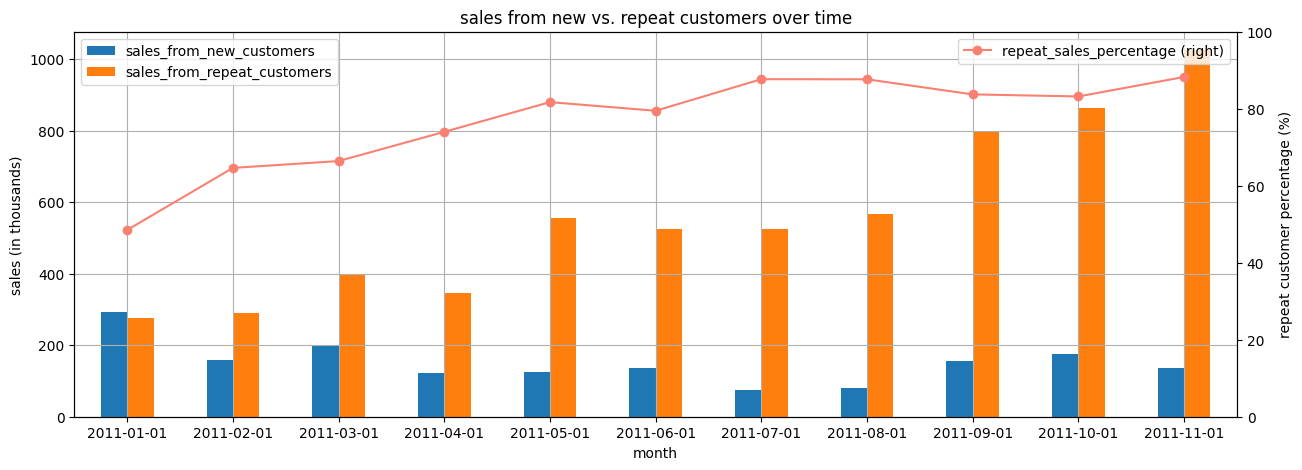

In [14]:
ax = (monthly_data_df[[
    "sales_from_new_customers", "sales_from_repeat_customers"
]]/1000).plot(kind="bar", grid=True, figsize=(15,5))

(monthly_data_df["repeat_sales_percentage"]*100).plot(
    ax=ax, secondary_y=True, color="salmon", style="-o"
)
ax.set_ylabel("sales (in thousands)")
ax.set_title("sales from new vs. repeat customers over time")
ax.right_ax.legend()
ax.right_ax.set_ylim([0, 100.0])
ax.right_ax.set_ylabel("repeat customer percentage (%)")
plt.show()

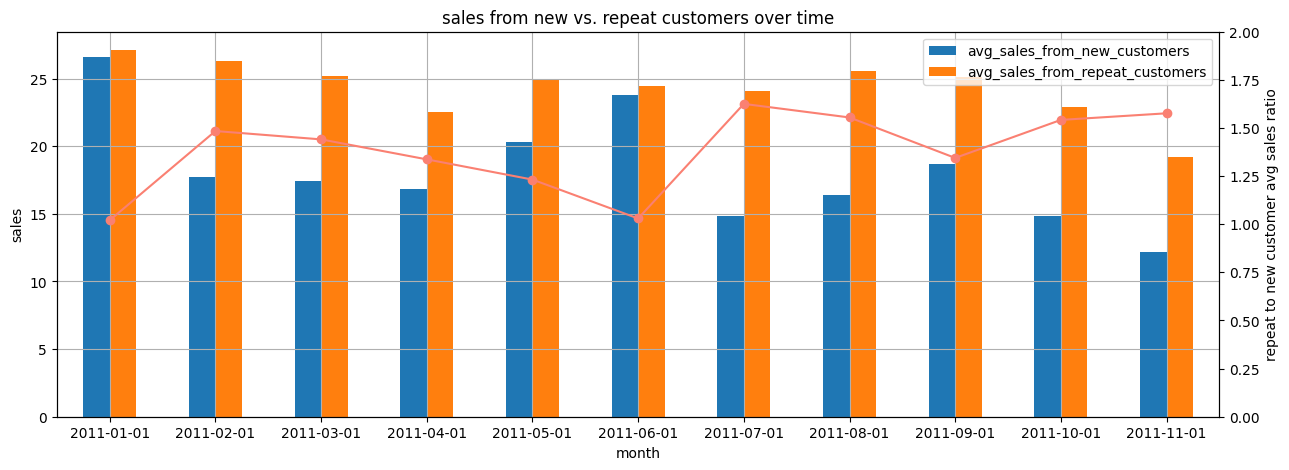

In [15]:
monthly_data_df["repeat_to_new_avg_sales_ratio"] = (
    monthly_data_df["avg_sales_from_repeat_customers"]
    /
    monthly_data_df["avg_sales_from_new_customers"]
)

ax = monthly_data_df[[
    "avg_sales_from_new_customers", "avg_sales_from_repeat_customers"
]].plot(kind="bar", grid=True, figsize=(15,5), rot=0)
ax.set_ylabel("sales")
ax.set_title("sales from new vs. repeat customers over time")

monthly_data_df["repeat_to_new_avg_sales_ratio"].plot(
    ax=ax, secondary_y=True, color="salmon", style="-o"
)
ax.right_ax.set_ylim([0, 2.0])
ax.right_ax.set_ylabel("repeat to new customer avg sales ratio")
plt.show()

In [16]:
monthly_data_df["repeat_to_new_avg_sales_ratio"]

month
2011-01-01    1.020704
2011-02-01    1.484121
2011-03-01    1.440697
2011-04-01    1.336884
2011-05-01    1.231854
2011-06-01    1.029738
2011-07-01    1.625144
2011-08-01    1.554579
2011-09-01    1.344354
2011-10-01    1.541864
2011-11-01    1.576202
Name: repeat_to_new_avg_sales_ratio, dtype: float64

## 2. Customer Segmentation with Purchase Behaviors

In [17]:
df = raw_df.copy()

### 2.1. Data Prep

In [18]:
df["CustomerID"].nunique()

4372

In [19]:
df["Sales"] = df["Quantity"] * df["UnitPrice"]

In [20]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Sales
count,406829.000000,406829,406829.000000,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,20.401854
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,4.200000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,11.100000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,19.500000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,248.693370,NaN,69.315162,1713.600303,427.591718


In [21]:
(df["Quantity"] < 0).sum()

8905

In [22]:
# Net Sales & Quantity
customer_net_df = df.groupby('CustomerID')[["Sales", "Quantity"]].sum()
customer_net_df.columns = ['NetSales', 'NetQuantity']

# Total Refunds
customer_refund_df = df.loc[
    df["Quantity"] < 0
].groupby("CustomerID")[["Sales", "Quantity"]].sum().abs()
customer_refund_df.columns = ['TotalRefund', 'TotalRefundQuantity']

customer_df = customer_net_df.merge(
    customer_refund_df, left_index=True, right_index=True, how="left"
).fillna(0)

In [23]:
customer_df

,NetSales,NetQuantity,TotalRefund,TotalRefundQuantity
CustomerID,,,,
12346.0,0.00,0,77183.60,74215.0
12347.0,4310.00,2458,0.00,0.0
12348.0,1797.24,2341,0.00,0.0
12349.0,1757.55,631,0.00,0.0
12350.0,334.40,197,0.00,0.0
...,...,...,...,...
18280.0,180.60,45,0.00,0.0
18281.0,80.82,54,0.00,0.0
18282.0,176.60,98,1.45,5.0


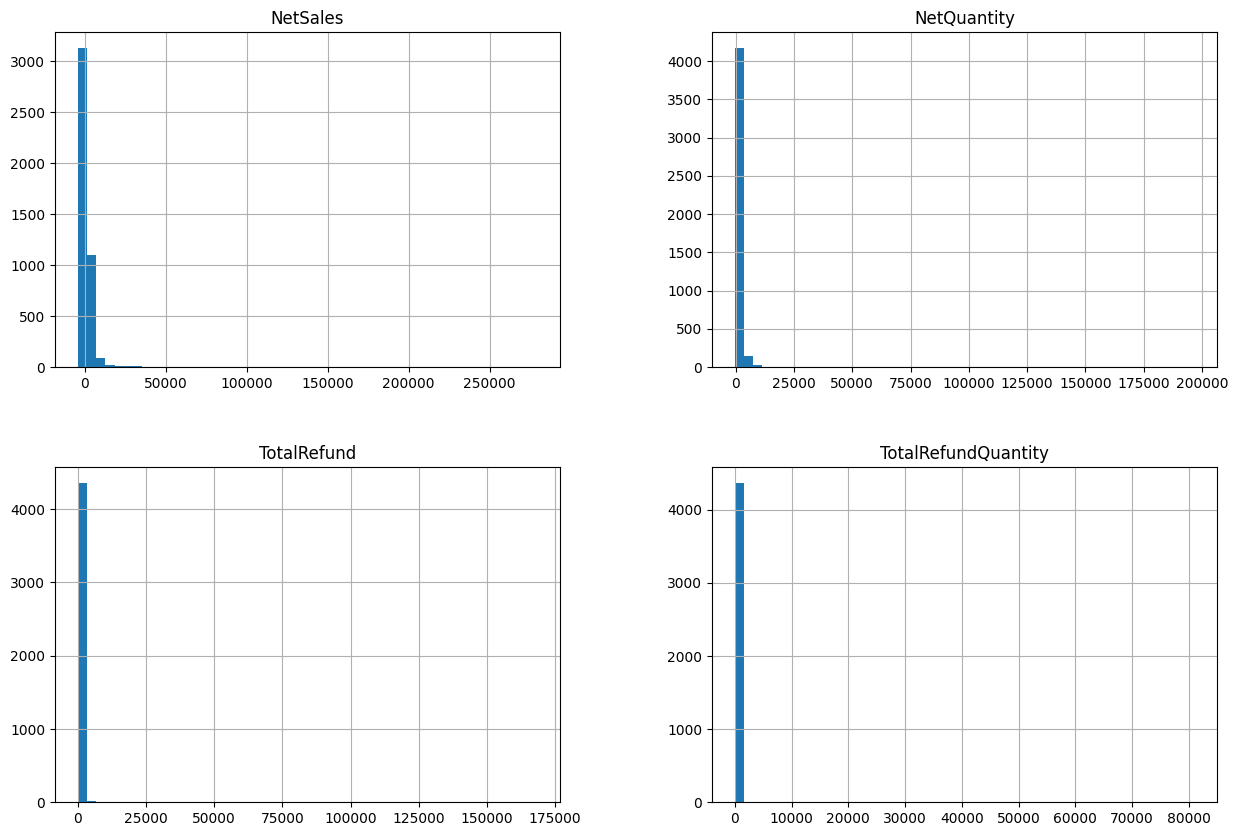

In [24]:
customer_df.hist(bins=50, figsize=(15,10))
plt.show()

In [25]:
log_customer_df = np.log(customer_df - customer_df.min() + 1)
log_customer_df.describe()

,NetSales,NetQuantity,TotalRefund,TotalRefundQuantity
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,8.616538,6.719784,1.334799,0.915773
std,0.363968,0.807619,1.988179,1.522898
min,0.000000,0.000000,0.000000,0.000000
25%,8.429889,6.124683,0.000000,0.000000
50%,8.504453,6.505784,0.000000,0.000000
75%,8.682768,7.143815,2.862201,1.609438
max,12.555946,12.191076,12.034517,11.302155


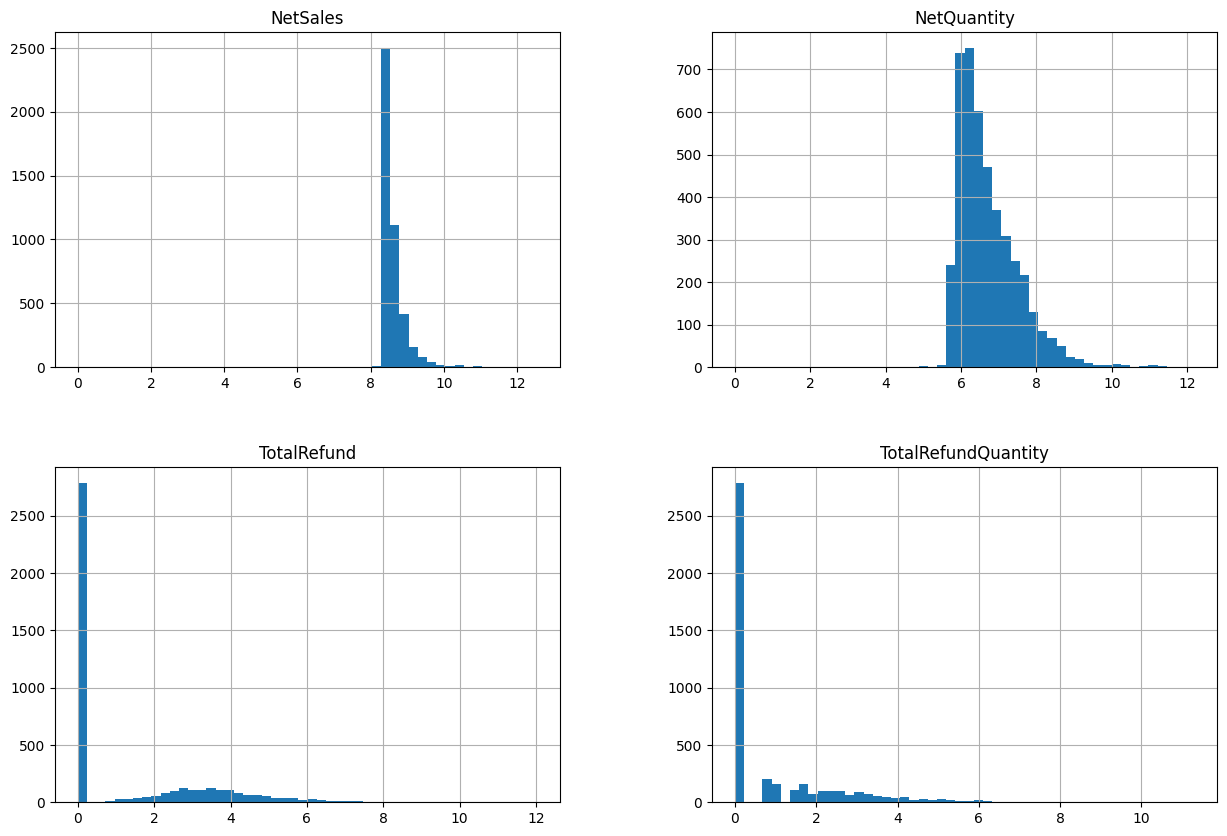

In [26]:
log_customer_df.hist(bins=50, figsize=(15,10))
plt.show()

### 2.2. K-Means Clustering

In [27]:
from sklearn.cluster import KMeans

In [28]:
import matplotlib.colors as mcolors

In [29]:
colors = list(mcolors.TABLEAU_COLORS.values())
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [30]:
def plot_clusters(c_df, col1, col2):
    clusters = sorted(c_df["cluster"].unique())
    for c in clusters:
        plt.scatter(
            c_df.loc[c_df['cluster'] == c][col1], 
            c_df.loc[c_df['cluster'] == c][col2],
            c=colors[c]
        )

    plt.title(f'{col1} vs. {col2} Clusters')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend(clusters)
    plt.show()

### 2.2.1. Without Centering & Handling Skewness

In [31]:
COLS = ['NetSales', 'NetQuantity', 'TotalRefundQuantity']
kmeans = KMeans(
    n_clusters=4, n_init="auto"
).fit(
    customer_df[COLS]
)

In [32]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [33]:
kmeans.cluster_centers_

array([[1.15381468e+03, 6.97460089e+02, 4.87348717e+01],
       [7.29240893e+04, 4.60345714e+04, 1.64335714e+03],
       [2.41136560e+05, 1.09956667e+05, 5.79333333e+02],
       [1.53284069e+04, 8.98537963e+03, 3.98944444e+02]])

In [34]:
cluster_df = customer_df[COLS].copy()
cluster_df["cluster"] = kmeans.labels_

In [35]:
cluster_df.groupby('cluster')['NetSales'].count()

cluster
0    4247
1      14
2       3
3     108
Name: NetSales, dtype: int64

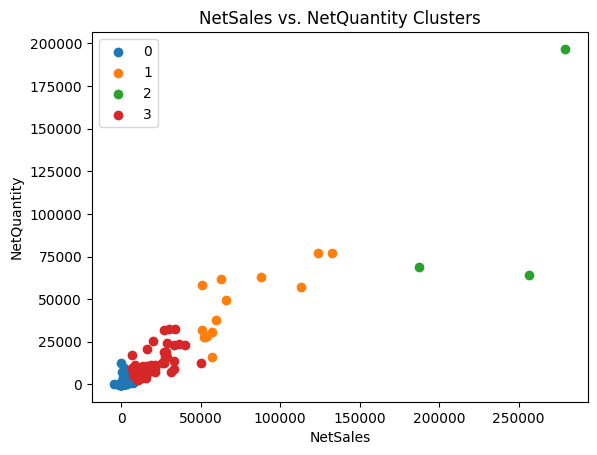

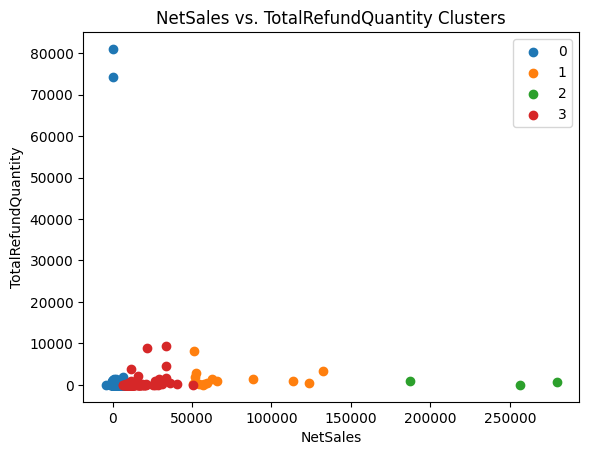

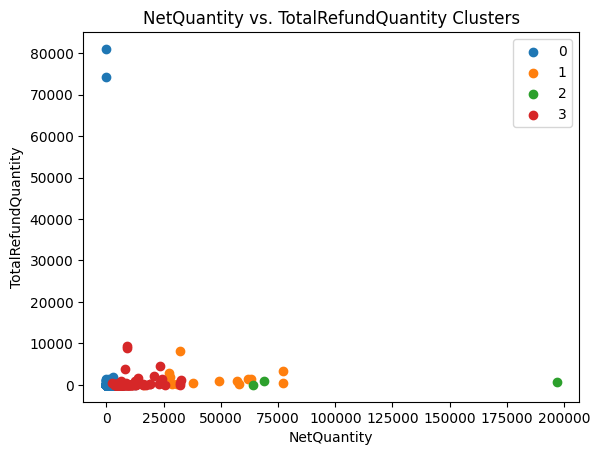

In [36]:
plot_clusters(cluster_df, "NetSales", "NetQuantity")
plot_clusters(cluster_df, "NetSales", "TotalRefundQuantity")
plot_clusters(cluster_df, "NetQuantity", "TotalRefundQuantity")

### 2.2.2. Log Transformed

In [37]:
COLS = ['NetSales', 'NetQuantity', 'TotalRefundQuantity']
kmeans = KMeans(
    n_clusters=4, n_init="auto"
).fit(
    log_customer_df[COLS]
)

In [38]:
cluster_df = log_customer_df[COLS].copy()
cluster_df["cluster"] = kmeans.labels_

In [39]:
cluster_df.groupby('cluster')['NetSales'].count()

cluster
0     815
1     884
2     311
3    2362
Name: NetSales, dtype: int64

In [40]:
cluster_df.groupby("cluster")[["NetSales", "NetQuantity", "TotalRefundQuantity"]].describe().T

cluster                             0           1           2            3
NetSales            count  815.000000  884.000000  311.000000  2362.000000
                    mean     8.761317    8.718826    9.206248     8.450655
                    std      0.265345    0.268936    0.755714     0.185611
                    min      8.363723    8.309231    8.038005     0.000000
                    25%      8.610109    8.507660    8.651393     8.406778
                    50%      8.698187    8.657455    9.006611     8.439213
                    75%      8.842142    8.859421    9.522374     8.491155
                    max     12.471230    9.891717   12.555946     8.951388
NetQuantity         count  815.000000  884.000000  311.000000  2362.000000
                    mean     7.360707    7.051433    7.871021     6.222931
                    std      0.511322    0.707646    1.371139     0.280591
                    min      6.706862    5.455321    0.000000     5.710427
                    25%      6.998509    6.499411    7.051771     5.991465
                    50%      7.213768    7.033506    7.879670     6.196444
                    75%      7.609861    7.537563    8.659474     6.435749
                    max     11.073273    9.255123   12.191076     6.829794
TotalRefundQuantity count  815.000000  884.000000  311.000000  2362.000000
                    mean     0.196787    2.396754    4.905363     0.084285
                    std      0.392337    0.674237    1.258106     0.273480
                    min      0.000000    1.386294    2.890372     0.000000
                    25%      0.000000    1.791759    4.034201     0.000000
                    50%      0.000000    2.302585    4.653960     0.000000
                    75%      0.000000    2.944439    5.488929     0.000000
                    max      1.386294    4.290459   11.302155     1.386294

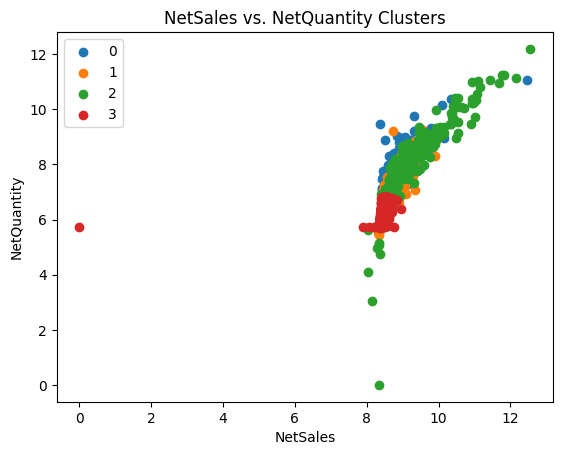

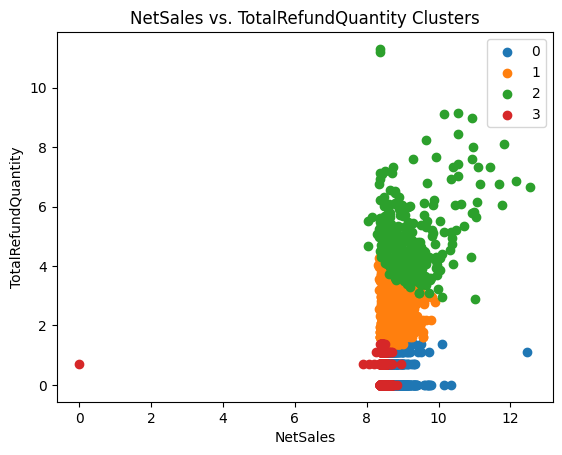

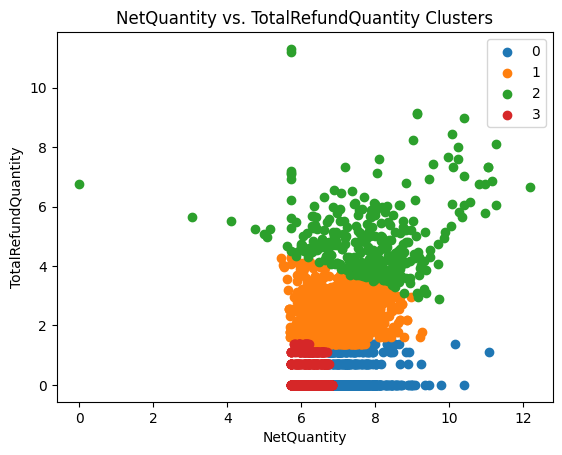

In [41]:
plot_clusters(cluster_df, "NetSales", "NetQuantity")
plot_clusters(cluster_df, "NetSales", "TotalRefundQuantity")
plot_clusters(cluster_df, "NetQuantity", "TotalRefundQuantity")

### 2.2.3. Finding the Best Number of Clusters

In [42]:
from sklearn.metrics import silhouette_score
silhouette_score(
    log_customer_df[COLS], 
    kmeans.labels_
)

0.4979889783093764

In [43]:
import matplotlib.cm as cm

Silhouette Score for 4 Clusters: 0.4987
Silhouette Score for 5 Clusters: 0.5288
Silhouette Score for 6 Clusters: 0.4395
Silhouette Score for 7 Clusters: 0.5076
Silhouette Score for 8 Clusters: 0.5113


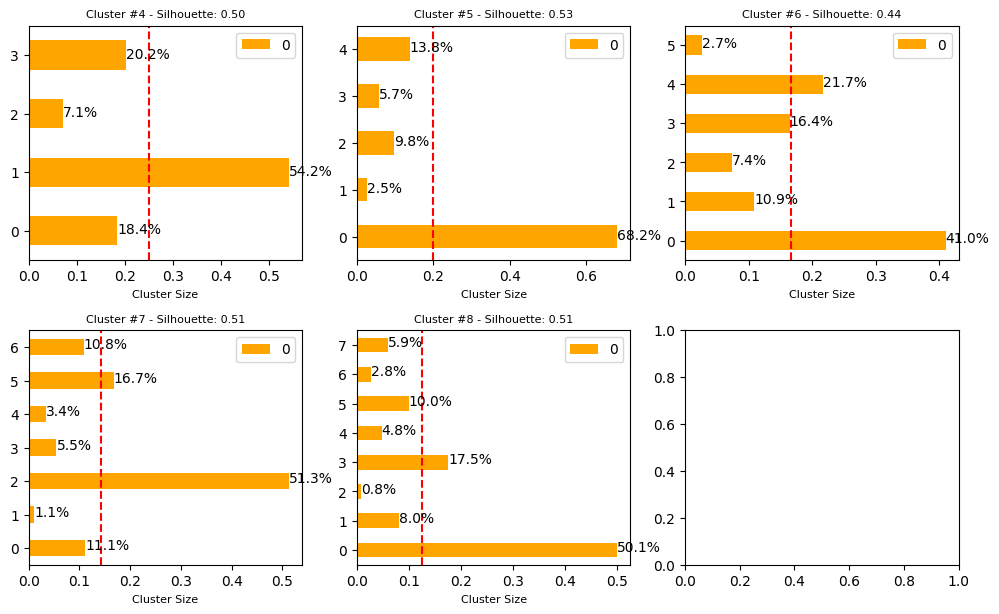

In [44]:
COLS = ['NetSales', 'NetQuantity', 'TotalRefundQuantity']

f, axes = plt.subplots(2, 3, sharey=False, figsize=(12, 7))

for i, n_cluster in enumerate([4,5,6,7,8]):
    kmeans = KMeans(n_clusters=n_cluster, n_init="auto").fit(
        log_customer_df[COLS]
    )
    silhouette_avg = silhouette_score(
        log_customer_df[COLS], 
        kmeans.labels_
    )
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))
    
    each_cluster_size = [
        (kmeans.labels_ == i).sum()/len(kmeans.labels_) for i in range(n_cluster)
    ]
    ax = axes[i//3][i%3]
    pd.DataFrame(each_cluster_size).plot(ax=ax, kind="barh", color="orange")
    for p in ax.patches:
        ax.annotate(f'{p.get_width()*100:.01f}%', (p.get_width(), p.get_y()+0.2))
    ax.axvline(x=(1/n_cluster), color="red", linestyle="--")
    ax.set_xlabel("Cluster Size", size=8)
    ax.set_title(f"Cluster #{n_cluster} - Silhouette: {silhouette_avg:.02f}")
    ax.title.set_size(8)
f.subplots_adjust(hspace=0.3)
plt.show()

## 3. Customer Segmentation with Product Interests

In [45]:
df = raw_df.copy()

In [46]:
df["Description"].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [47]:
customer_item_df = pd.DataFrame(
    df.groupby("CustomerID")["Description"].apply(lambda x: ", ".join(list(set(x))))
)

In [48]:
customer_item_df

,Description
CustomerID,
12346.0,MEDIUM CERAMIC TOP STORAGE JAR
12347.0,"SET/2 RED RETROSPOT TEA TOWELS , TRADITIONAL K..."
12348.0,"PACK OF 72 SKULL CAKE CASES, PACK OF 12 HEARTS..."
12349.0,"PLASTERS IN TIN SKULLS, PARISIENNE CURIO CABIN..."
12350.0,"RETRO PLASTIC ELEPHANT TRAY, PINK/PURPLE RETRO..."
...,...
18280.0,"ALARM CLOCK BAKELIKE CHOCOLATE, PAPER CHAIN KI..."
18281.0,"DOLLY GIRL BABY GIFT SET, SPACEBOY BABY GIFT ..."
18282.0,"SET OF 12 MINI LOAF BAKING CASES, FAIRY CAKE F..."


### 3.1. Embedding Vectors

In [49]:
#%pip install markupsafe==2.0.1

In [50]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [51]:
from sentence_transformers import SentenceTransformer, util

/home/kubwa/anaconda3/envs/lecture/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
2025-02-09 10:41:49.359688: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-09 10:41:49.460680: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-09 10:41:49.792903: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in o

In [52]:
embedding_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

In [53]:
%%time

encoded = embedding_model.encode(
    list(customer_item_df["Description"]), 
    show_progress_bar=True
)

Batches:   0%|          | 0/137 [00:00<?, ?it/s]

CPU times: user 8.16 s, sys: 230 ms, total: 8.39 s
Wall time: 8.49 s


In [54]:
with open('tmp.npy', 'wb') as f:
    np.save(f, encoded)

## 3.2. Clustering

In [55]:
with open('tmp.npy', 'rb') as f:
    encoded = np.load(f)

In [56]:
encoded

array([[ 0.01590371,  0.06054774, -0.07032835, ..., -0.08511788,
        -0.0407258 ,  0.02845756],
       [ 0.01404683, -0.00574339,  0.0354966 , ...,  0.02414726,
        -0.02976527,  0.00494615],
       [ 0.01354773,  0.06244014,  0.04142255, ...,  0.00273061,
        -0.01820899, -0.00612408],
       ...,
       [ 0.06883979,  0.03281311,  0.00959319, ..., -0.01611734,
        -0.05762475, -0.02396132],
       [ 0.01989705,  0.00738782,  0.02367606, ...,  0.02877871,
        -0.01761744,  0.0084164 ],
       [ 0.01394589,  0.03814252,  0.0460212 , ...,  0.00029445,
        -0.00146289,  0.01197584]], dtype=float32)

In [57]:
encoded.shape

(4372, 384)

### 3.2.1. Dimensionality Reduction

In [58]:
from sklearn.decomposition import PCA

In [59]:
%%time

pca = PCA(n_components=5)
transforemd_encoded = pca.fit_transform(encoded)

CPU times: user 263 ms, sys: 1.03 s, total: 1.29 s
Wall time: 62.3 ms


In [60]:
pca.explained_variance_ratio_

array([0.1198197 , 0.05896784, 0.05070392, 0.04122422, 0.03317004],
      dtype=float32)

In [61]:
pca.singular_values_

array([13.422973 ,  9.416558 ,  8.731832 ,  7.873372 ,  7.0624857],
      dtype=float32)

In [62]:
transforemd_encoded.shape

(4372, 5)

### 3.2.2. K-Means Clustering

In [63]:
from sklearn.cluster import KMeans

In [64]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [65]:
from collections import Counter

In [66]:
for n_cluster in [4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster, n_init="auto").fit(
        transforemd_encoded
    )
    
    silhouette_avg = silhouette_score(
        transforemd_encoded, 
        kmeans.labels_
    )
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))


Silhouette Score for 4 Clusters: 0.2275
Silhouette Score for 5 Clusters: 0.2143
Silhouette Score for 6 Clusters: 0.2190
Silhouette Score for 7 Clusters: 0.2057
Silhouette Score for 8 Clusters: 0.2188


In [67]:
n_cluster = 7
kmeans = KMeans(n_clusters=n_cluster, n_init="auto").fit(
    transforemd_encoded
)

In [68]:
customer_item_df["cluster"] = kmeans.labels_

In [69]:
n_items = 5
common_items = []
for i in range(n_cluster):
    most_common_items = Counter(list(df.set_index("CustomerID").loc[
            customer_item_df.loc[
            customer_item_df["cluster"] == i
        ].index
    ]["Description"])).most_common(n_items)
    
    common_items.append({
        f"item_{j}": most_common_items[j][0] for j in range(n_items)
    })

In [70]:
common_items_df = pd.DataFrame(common_items)

In [71]:
common_items_df

,item_0,item_1,item_2,item_3,item_4
0,PAPER CHAIN KIT 50'S CHRISTMAS,WHITE HANGING HEART T-LIGHT HOLDER,REGENCY CAKESTAND 3 TIER,ASSORTED COLOUR BIRD ORNAMENT,PAPER CHAIN KIT VINTAGE CHRISTMAS
1,JUMBO BAG RED RETROSPOT,LUNCH BAG RED RETROSPOT,LUNCH BAG BLACK SKULL.,LUNCH BAG SPACEBOY DESIGN,LUNCH BAG PINK POLKADOT
2,REGENCY CAKESTAND 3 TIER,ROSES REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER,ASSORTED COLOUR BIRD ORNAMENT
3,WHITE HANGING HEART T-LIGHT HOLDER,REGENCY CAKESTAND 3 TIER,ASSORTED COLOUR BIRD ORNAMENT,HEART OF WICKER SMALL,WOODEN PICTURE FRAME WHITE FINISH
4,WHITE HANGING HEART T-LIGHT HOLDER,VICTORIAN GLASS HANGING T-LIGHT,ANTIQUE SILVER T-LIGHT GLASS,NATURAL SLATE HEART CHALKBOARD,ASSORTED COLOUR BIRD ORNAMENT
5,POSTAGE,JUMBO BAG RED RETROSPOT,VINTAGE SNAP CARDS,BAKING SET 9 PIECE RETROSPOT,RED HARMONICA IN BOX
6,Manual,HOT WATER BOTTLE KEEP CALM,CHILLI LIGHTS,CHOCOLATE HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.
